 # Mortgage Loan Analysis

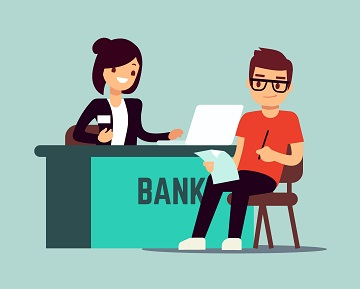

# Importing All Packages

In [7]:
import numpy as np
import pandas as pd
import sweetviz as sv
import matplotlib.pylab as plt
import seaborn as sns

from datetime import datetime

import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
from sklearn.model_selection import cross_val_score

# Importing the data sets

In [2]:
train = pd.read_csv('BankCustomerTrain.csv')
test = pd.read_csv('BankCustomerTest.csv')

In [3]:
train['source']='train'
test['source']='test'
data = pd.concat([train,test],ignore_index=True ,sort =True)
train.shape, test.shape, data.shape

((22310, 9), (5198, 8), (27508, 9))

# <center>EDA(Exploratory Data Analysis)<center>

In [4]:
data.head(5)

,Age,Credit Card,Credit Score,Income,Line of Credit,Loan Balance,Mortgage Balance,Owns Home,source
0,63,1.0,696,16,0,0.0,0.0,1,train
1,51,1.0,674,4,0,0.0,0.0,1,train
2,60,1.0,640,30,0,0.0,0.0,1,train
3,44,1.0,672,125,0,0.0,0.0,1,train
4,46,0.0,648,25,0,0.0,0.0,1,train


In [5]:
data.tail(5)

,Age,Credit Card,Credit Score,Income,Line of Credit,Loan Balance,Mortgage Balance,Owns Home,source
27503,51,NaN,720,35,0,0.0,0.0,1,test
27504,39,NaN,578,4,0,0.0,0.0,0,test
27505,48,NaN,673,27,0,0.0,0.0,1,test
27506,58,NaN,700,44,0,0.0,0.0,1,test
27507,56,NaN,740,2,0,0.0,0.0,1,test


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,27508.0,47.978661,14.105555,16.0,38.0,48.0,58.0,94.00
Credit Card,22310.0,0.481174,0.499657,0.0,0.0,0.0,1.0,1.00
Credit Score,27508.0,666.740803,40.455977,518.0,640.0,667.0,694.0,820.00
Income,27508.0,40.303730,28.241792,0.0,20.0,34.0,55.0,233.00
Line of Credit,27508.0,0.055039,0.228060,0.0,0.0,0.0,0.0,1.00
Loan Balance,27508.0,484.398374,2223.389827,0.0,0.0,0.0,0.0,29162.79
Mortgage Balance,27508.0,7116.476828,81095.844747,0.0,0.0,0.0,0.0,10887573.28
Owns Home,27508.0,0.540788,0.498343,0.0,0.0,1.0,1.0,1.00


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27508 entries, 0 to 27507
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               27508 non-null  int64  
 1   Credit Card       22310 non-null  float64
 2   Credit Score      27508 non-null  int64  
 3   Income            27508 non-null  int64  
 4   Line of Credit    27508 non-null  int64  
 5   Loan Balance      27508 non-null  float64
 6   Mortgage Balance  27508 non-null  float64
 7   Owns Home         27508 non-null  int64  
 8   source            27508 non-null  object 
dtypes: float64(3), int64(5), object(1)
memory usage: 1.9+ MB


In [13]:
data1 = sv.analyze([data,"Data1"],target_feat= 'Credit Score')

In [14]:
data1.show_html('Report.html')

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# checking the missing values

In [8]:
data.apply(lambda x:sum(x.isnull()))

Age                    0
Credit Card         5198
Credit Score           0
Income                 0
Line of Credit         0
Loan Balance           0
Mortgage Balance       0
Owns Home              0
source                 0
dtype: int64

In [9]:
data.shape

(27508, 9)

In [10]:
data.apply(lambda x: len(x.unique()))

Age                   79
Credit Card            3
Credit Score         276
Income               197
Line of Credit         2
Loan Balance        1026
Mortgage Balance    1008
Owns Home              2
source                 2
dtype: int64

# Filter categorical variables

In [11]:

categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns 
                       if x not in ['Item_Identifier','Outlet_Identifier','source']]



# Print frequency of categories

In [12]:
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (data[col].value_counts() )

# checking Duplicate values and removing

In [13]:
train=train.drop_duplicates()
train['source']='train'
test['source']='test'
data_nodub = pd.concat([train,test],ignore_index=True, sort=True)
print(data.shape,data_nodub.shape,'\n Number of duplicate data : ',data.shape[0]-data_nodub.shape[0])

(27508, 9) (27405, 9) 
 Number of duplicate data :  103


In [14]:
data=data_nodub

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27405 entries, 0 to 27404
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               27405 non-null  int64  
 1   Credit Card       22207 non-null  float64
 2   Credit Score      27405 non-null  int64  
 3   Income            27405 non-null  int64  
 4   Line of Credit    27405 non-null  int64  
 5   Loan Balance      27405 non-null  float64
 6   Mortgage Balance  27405 non-null  float64
 7   Owns Home         27405 non-null  int64  
 8   source            27405 non-null  object 
dtypes: float64(3), int64(5), object(1)
memory usage: 1.9+ MB


# Checking Percentage of missing values

In [16]:
def percentage_of_miss():
  df1=data[data.columns[data.isnull().sum()>=1]]
  total_miss = df1.isnull().sum().sort_values(ascending=False)
  percent_miss = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)
  missing_data = pd.concat([total_miss, percent_miss], axis=1, keys=['Number of Missing', 'Percentage'])
  return(missing_data)

In [17]:
percentage_of_miss()

,Number of Missing,Percentage
Credit Card,5198,0.189673


In [18]:
data_columns=data.columns
print(data_columns)

Index(['Age', 'Credit Card', 'Credit Score', 'Income', 'Line of Credit',
       'Loan Balance', 'Mortgage Balance', 'Owns Home', 'source'],
      dtype='object')


# Outlier Analysis

In [19]:
def outlier_analysis(col):
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    UIF=Q3+1.5*(IQR)
    LIF=Q1-1.5*(IQR)
    data_out =data[(data[col]<LIF) | (data[col]>UIF)] 
    sns.distplot(data_out[col])#Plotting univariate distributions.By default, this will draw a histogram and fit a kernel density estimate (KDE)
   
    return data_out[col] .describe()

count    200.000000
mean     668.935000
std      121.195389
min      518.000000
25%      552.000000
50%      776.000000
75%      784.000000
max      820.000000
Name: Credit Score, dtype: float64

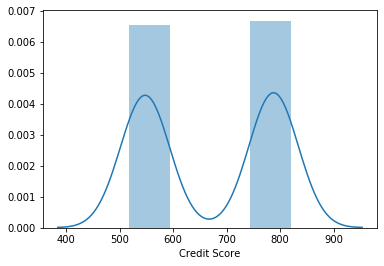

In [20]:
outlier_analysis('Credit Score')

count    64.000000
mean     90.906250
std       1.687665
min      89.000000
25%      89.000000
50%      91.000000
75%      92.000000
max      94.000000
Name: Age, dtype: float64

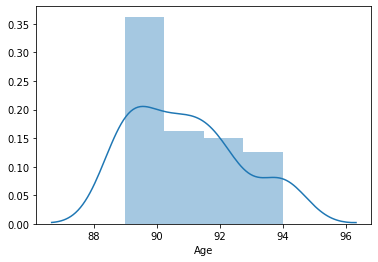

In [21]:
outlier_analysis('Age')

count    843.000000
mean     130.270463
std       21.823856
min      108.000000
25%      114.000000
50%      124.000000
75%      138.000000
max      233.000000
Name: Income, dtype: float64

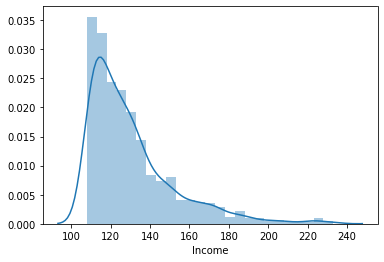

In [22]:
outlier_analysis('Income')

count     1272.000000
mean     10475.495645
std       1497.477766
min       9690.090000
25%      10021.067500
50%      10133.445000
75%      10346.980000
max      29162.790000
Name: Loan Balance, dtype: float64

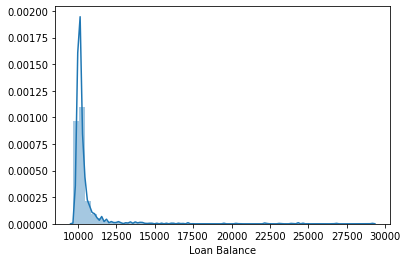

In [23]:
outlier_analysis('Loan Balance')

# finding unique values, mode and fequency of mode

In [24]:
data.astype('object').describe().transpose()

,count,unique,top,freq
Age,27405,79,48,789
Credit Card,22207,2,0,11509
Credit Score,27405,276,665,295
Income,27405,197,20,775
Line of Credit,27405,2,0,25893
Loan Balance,27405,1026,0,26133
Mortgage Balance,27405,1008,0,26187
Owns Home,27405,2,1,14833
source,27405,2,train,22207


# heat map

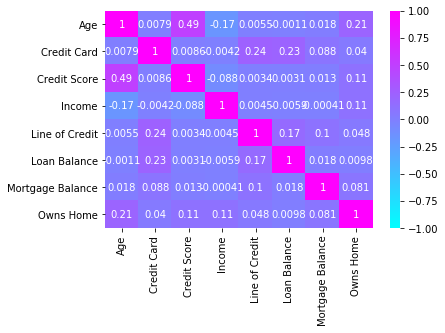

In [25]:
corr_ad_data = data.corr()
sns.heatmap(corr_ad_data, vmin = -1, vmax = 1, annot = True, cmap= 'cool')


# pairplot to describe the data sets

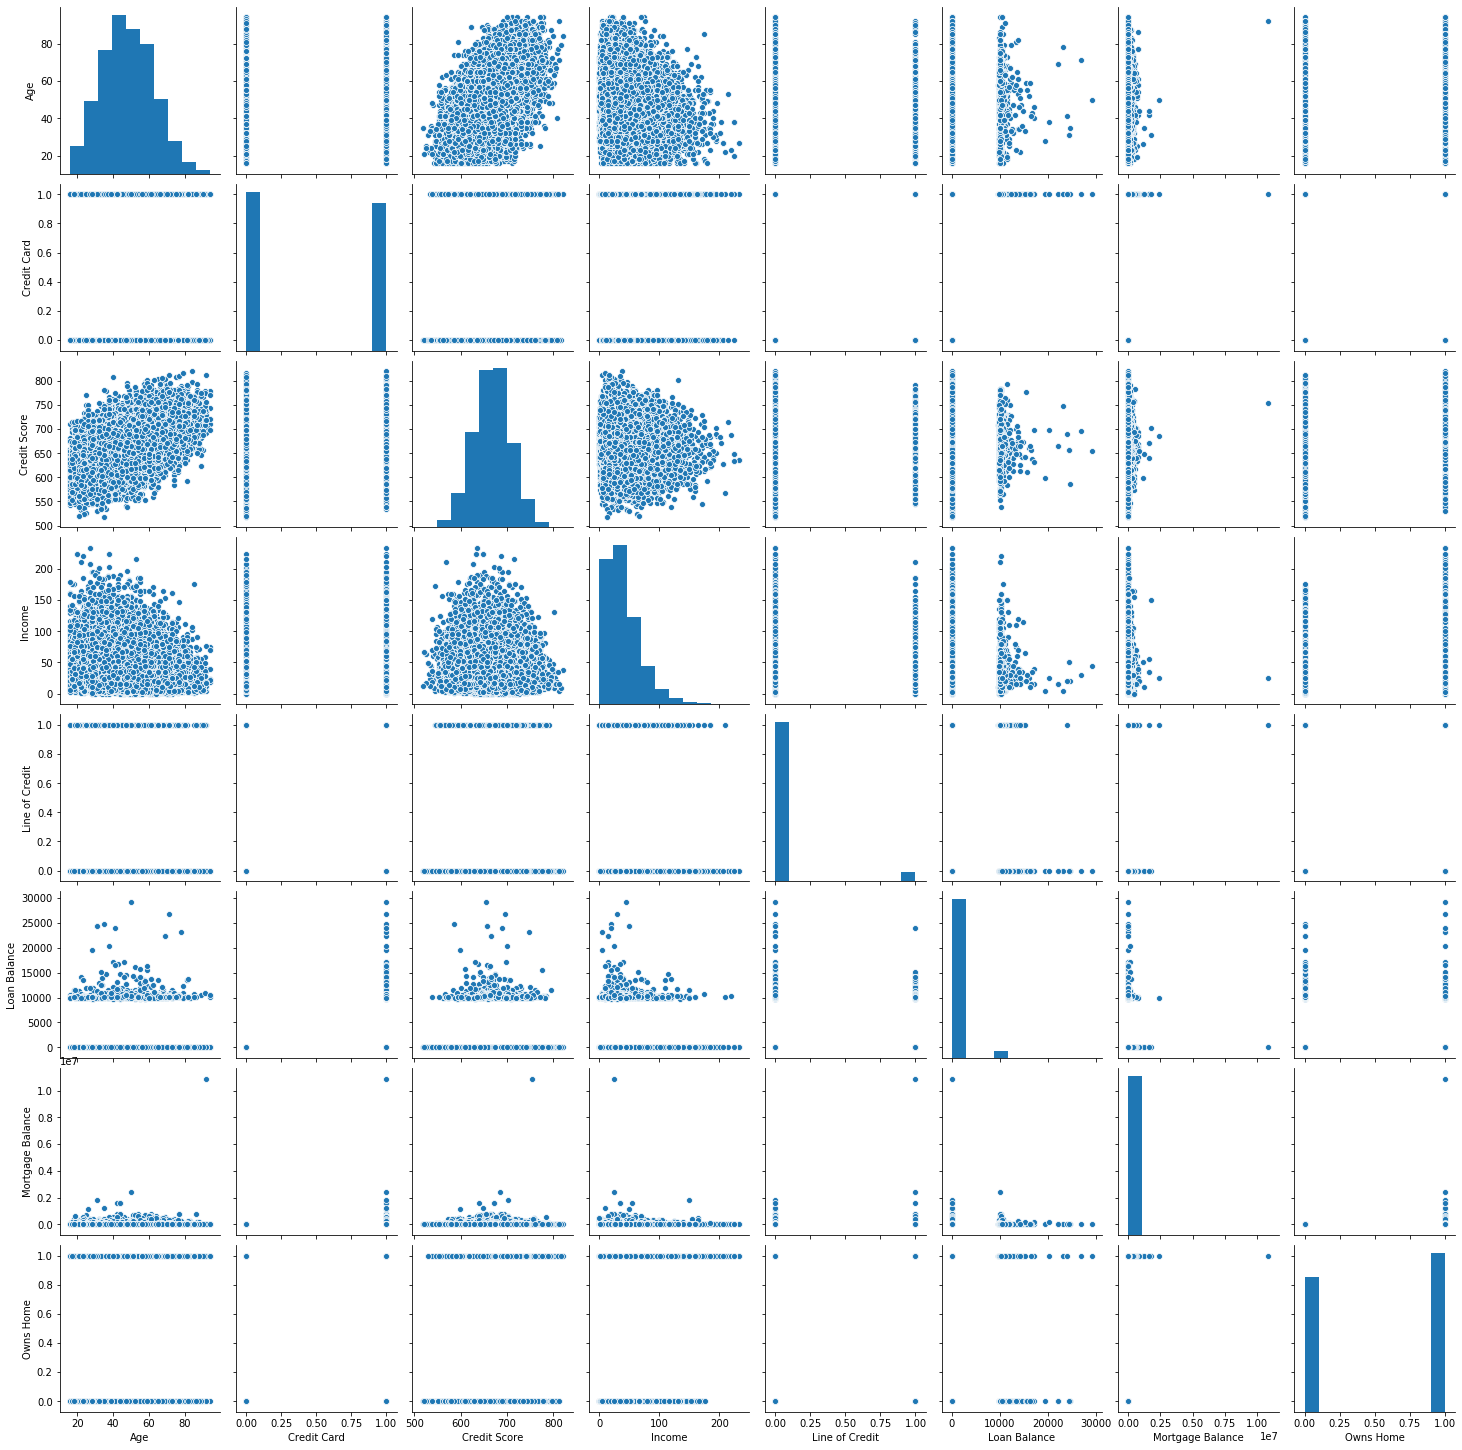

In [26]:
sns.pairplot(data)

# ------------------------------------------------------------------------------------
# uni-variate analysis
# -----------------------------------------------------------------------------------

**1 Credit Card**

In [27]:
Credit =data['Credit Card'].value_counts()
Credit 

0.0    11509
1.0    10698
Name: Credit Card, dtype: int64

Text(0.5, 1, 'Credit card counts')

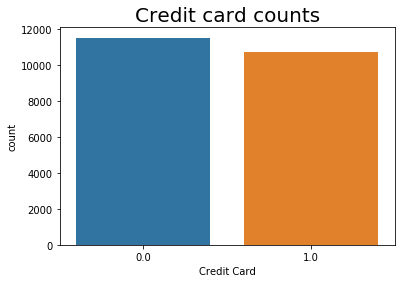

In [28]:
#countplot
sns.countplot(data['Credit Card'])
plt.title("Credit card counts", y=1, fontdict={"fontsize": 20})

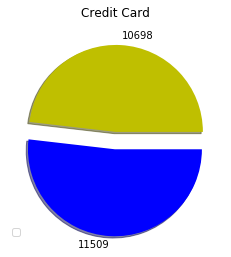

In [29]:
#Pie chart

values = [Credit[0],Credit[1]]
colors = ['b', 'y']
labels = ['No Credit card',' Holding card']
explode = (0.2, 0)
plt.title('Credit Card')
plt.legend(labels,loc=3)
plt.pie(values, colors=colors, labels= values,explode=explode,
        counterclock=False, shadow=True)

plt.show()

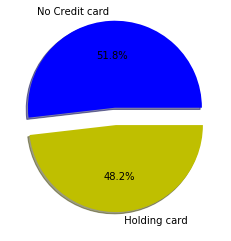

In [30]:
#Pie chart

plt.pie(values, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%', counterclock=True, shadow=True)

plt.show()

**2 Line of credit**

Text(0.5, 1, 'Line of credit counts')

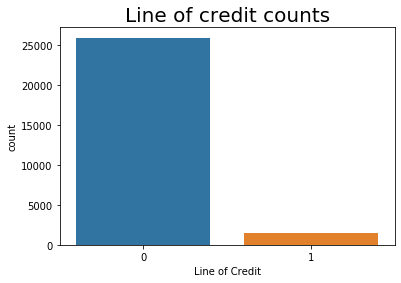

In [31]:
sns.countplot(data['Line of Credit'])
plt.title("Line of credit counts", y=1, fontdict={"fontsize": 20})

In [32]:
Line =data['Line of Credit'].value_counts()
Line 

0    25893
1     1512
Name: Line of Credit, dtype: int64

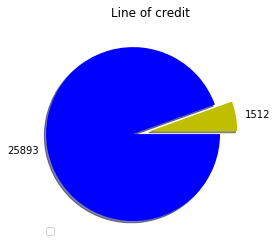

In [33]:
values = [Line[0],Line[1]]
colors = ['b', 'y']
labels = ['No Line of credit','line of credit']
explode = (0.2, 0)
plt.title('Line of credit')
plt.legend(labels,loc=3)
plt.pie(values, colors=colors, labels= values,explode=explode,
        counterclock=False, shadow=True)

plt.show()

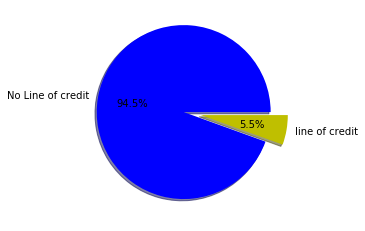

In [34]:
plt.pie(values, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%', counterclock=True, shadow=True)

plt.show()

**4 Owns Home**

Text(0.5, 1, 'Owns house counts')

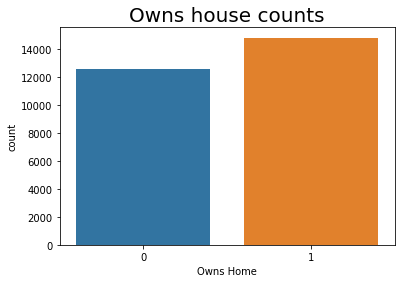

In [35]:
sns.countplot(data['Owns Home'])
plt.title("Owns house counts", y=1, fontdict={"fontsize": 20})

In [36]:
House =data['Owns Home'].value_counts()
House 

1    14833
0    12572
Name: Owns Home, dtype: int64

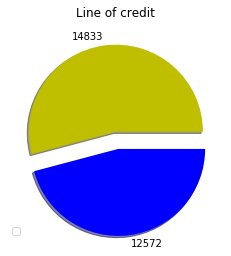

In [37]:
values = [House[0],House[1]]
colors = ['b', 'y']
labels = ['No House','owns House']
explode = (0.2, 0)
plt.title('Line of credit')
plt.legend(labels,loc=3)
plt.pie(values, colors=colors, labels= values,explode=explode,
        counterclock=False, shadow=True)

plt.show()

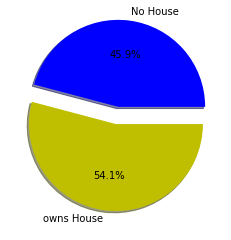

In [38]:
plt.pie(values, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%', counterclock=True, shadow=True)

plt.show()

**5 Credit Score**

In [39]:
data['Credit Score'] = data['Credit Score'].apply(lambda val: (val /10) if (val>850 and val%10==0) else val)
data['Credit Score'].describe()

count    27405.000000
mean       666.720124
std         40.501626
min        518.000000
25%        640.000000
50%        667.000000
75%        694.000000
max        820.000000
Name: Credit Score, dtype: float64

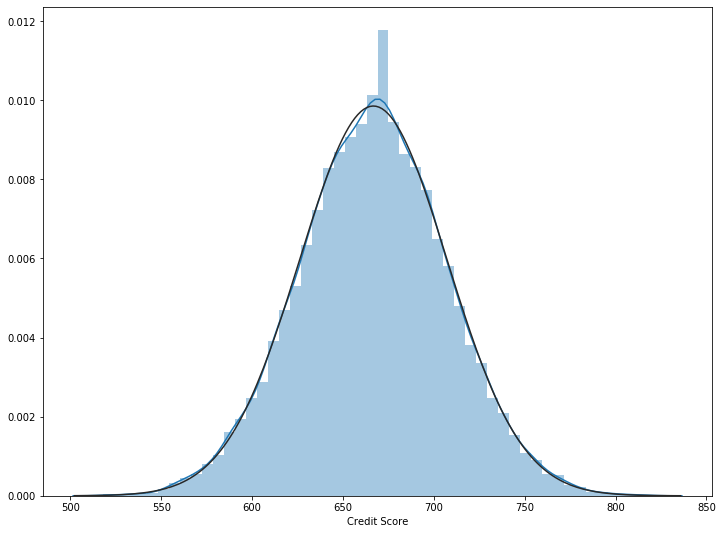

In [40]:
data_1= data.drop(data.loc[data['Credit Score'].isnull()].index)
from scipy.stats import norm
plt.figure(figsize=(12,9))
sns.distplot(data_1['Credit Score'], fit= norm)

Text(0.5, 0, 'Credit Score')

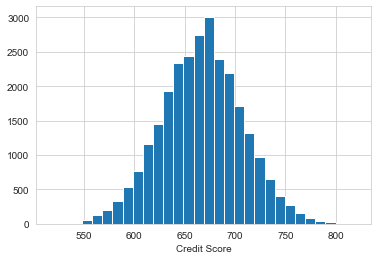

In [41]:
sns.set_style('whitegrid')
data['Credit Score'].hist(bins=30)
plt.xlabel('Credit Score')

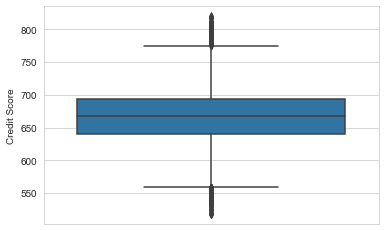

In [42]:
sns.boxplot( y=data['Credit Score'] )

**6 Income**

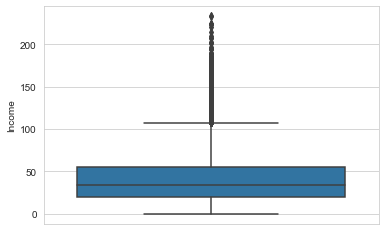

In [43]:
sns.boxplot( y=data['Income'] )

Text(0.5, 0, 'Income')

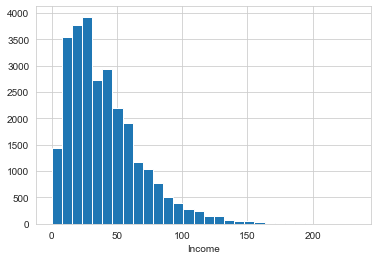

In [44]:
sns.set_style('whitegrid')
data['Income'].hist(bins=30)
plt.xlabel('Income')

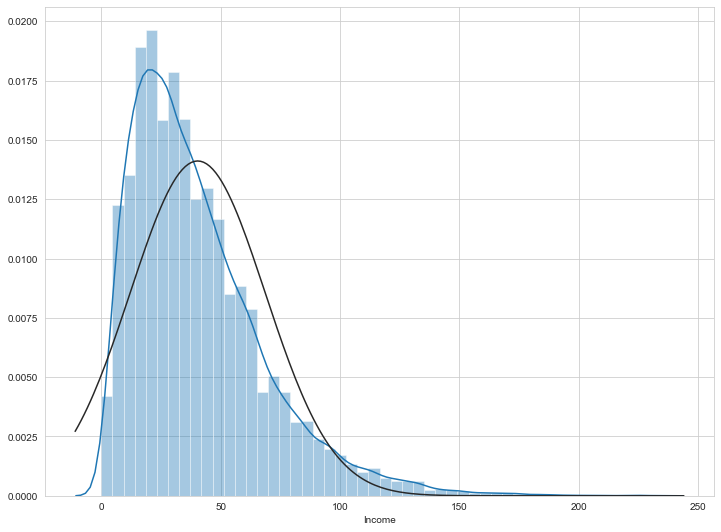

In [45]:
data_1= data.drop(data.loc[data['Income'].isnull()].index)
from scipy.stats import norm
plt.figure(figsize=(12,9))
sns.distplot(data_1['Income'], fit= norm)

**7 Age**

Text(0.5, 0, 'Age')

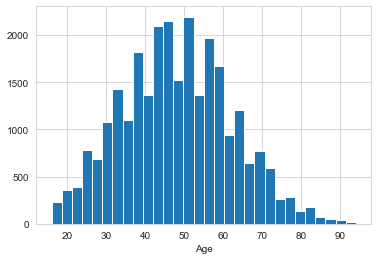

In [46]:
sns.set_style('whitegrid')
data['Age'].hist(bins=30)
plt.xlabel('Age')

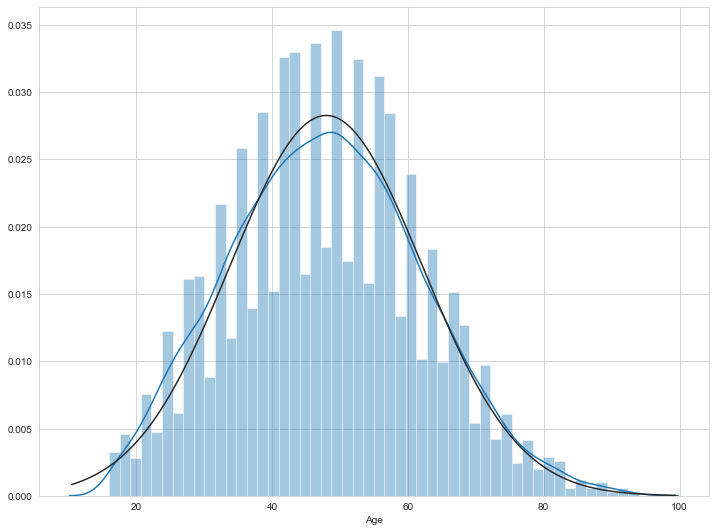

In [47]:
data_1= data.drop(data.loc[data['Age'].isnull()].index)
from scipy.stats import norm
plt.figure(figsize=(12,9))
sns.distplot(data_1['Age'], fit= norm)

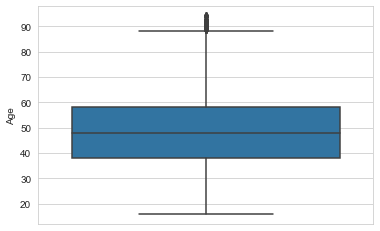

In [48]:
sns.boxplot( y=data['Age'] )

# ---------------------------------------------------
# Bi- Variate Analysis
# ----------------------------------------------------

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27405 entries, 0 to 27404
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               27405 non-null  int64  
 1   Credit Card       22207 non-null  float64
 2   Credit Score      27405 non-null  int64  
 3   Income            27405 non-null  int64  
 4   Line of Credit    27405 non-null  int64  
 5   Loan Balance      27405 non-null  float64
 6   Mortgage Balance  27405 non-null  float64
 7   Owns Home         27405 non-null  int64  
 8   source            27405 non-null  object 
dtypes: float64(3), int64(5), object(1)
memory usage: 1.9+ MB


**Graphs Bi-Variate**

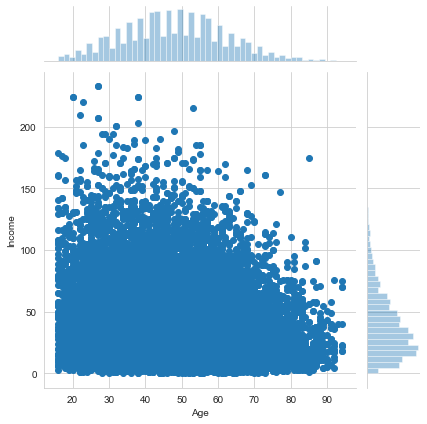

In [50]:
sns.jointplot(x='Age',y='Income',data=data)

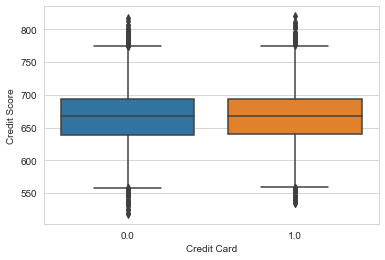

In [51]:
ax = sns.boxplot(x='Credit Card', y='Credit Score', data=data)

# -----------------------------------------------------------------------------------------------------------------
# <center> ***Chi Square***<center>
# ---------------------------------------------------------------------------------------------------------------

In [52]:
contigency_table= pd.crosstab(data['Line of Credit'],data['Credit Card'])
contigency_table

Credit Card,0.0,1.0
Line of Credit,,
0,11482,9484
1,27,1214


In [53]:
from scipy.stats.contingency import chi2_contingency
chi_2, p_val, dof, exp_val = chi2_contingency(contigency_table)

print('Chi-square is %f'%chi_2, '\n\np_value is %f'%p_val, '\n\ndegree of freedom is %i'%dof)

if p_val < 0.05:
    print("\nThere is some correlation between the two variables at significance level 0.05")
else:
    print("\nThere is no correlation between the two variables")

Chi-square is 1295.761143 

p_value is 0.000000 

degree of freedom is 1

There is some correlation between the two variables at significance level 0.05


In [54]:
contigency_table= pd.crosstab(data['Owns Home'],data['Credit Card'])
contigency_table

Credit Card,0.0,1.0
Owns Home,,
0,5515,4703
1,5994,5995


In [55]:
from scipy.stats.contingency import chi2_contingency
chi_2, p_val, dof, exp_val = chi2_contingency(contigency_table)

print('Chi-square is %f'%chi_2, '\n\np_value is %f'%p_val, '\n\ndegree of freedom is %i'%dof)

if p_val < 0.05:
    print("\nThere is some correlation between the two variables at significance level 0.05")
else:
    print("\nThere is no correlation between the two variables")

Chi-square is 34.797536 

p_value is 0.000000 

degree of freedom is 1

There is some correlation between the two variables at significance level 0.05


In [56]:
contigency_table= pd.crosstab(data['Age'],data['Credit Card'])
contigency_table

Credit Card,0.0,1.0
Age,,
16,31,26
17,41,24
18,44,33
19,47,41
20,53,46
...,...,...
90,5,5
91,4,7
92,3,7


In [57]:
from scipy.stats.contingency import chi2_contingency
chi_2, p_val, dof, exp_val = chi2_contingency(contigency_table)

print('Chi-square is %f'%chi_2, '\n\np_value is %f'%p_val, '\n\ndegree of freedom is %i'%dof)

if p_val < 0.05:
    print("\nThere is some correlation between the two variables at significance level 0.05")
else:
    print("\nThere is no correlation between the two variables")

Chi-square is 61.673644 

p_value is 0.912612 

degree of freedom is 78

There is no correlation between the two variables


In [58]:
contigency_table= pd.crosstab(data['Credit Score'],data['Credit Card'])
contigency_table

Credit Card,0.0,1.0
Credit Score,,
518,1,0
520,1,0
524,1,0
525,1,0
530,1,0
...,...,...
810,0,1
811,0,1
813,1,0


In [59]:
from scipy.stats.contingency import chi2_contingency
chi_2, p_val, dof, exp_val = chi2_contingency(contigency_table)

print('Chi-square is %f'%chi_2, '\n\np_value is %f'%p_val, '\n\ndegree of freedom is %i'%dof)

if p_val < 0.05:
    print("\nThere is some correlation between the two variables at significance level 0.05")
else:
    print("\nThere is no correlation between the two variables")

Chi-square is 271.154328 

p_value is 0.554202 

degree of freedom is 275

There is no correlation between the two variables


In [60]:
contigency_table= pd.crosstab(data['Income'],data['Credit Card'])
contigency_table

Credit Card,0.0,1.0
Income,,
0,9,19
1,26,18
2,51,23
3,74,52
4,87,67
...,...,...
210,0,1
215,1,0
220,0,1


In [61]:
from scipy.stats.contingency import chi2_contingency
chi_2, p_val, dof, exp_val = chi2_contingency(contigency_table)

print('Chi-square is %f'%chi_2, '\n\np_value is %f'%p_val, '\n\ndegree of freedom is %i'%dof)

if p_val < 0.05:
    print("\nThere is some correlation between the two variables at significance level 0.05")
else:
    print("\nThere is no correlation between the two variables")

Chi-square is 1227.641622 

p_value is 0.000000 

degree of freedom is 196

There is some correlation between the two variables at significance level 0.05


In [62]:
contigency_table= pd.crosstab(data['Loan Balance'],data['Credit Card'])
contigency_table

Credit Card,0.0,1.0
Loan Balance,,
0.00,11509,9667
9690.09,0,1
9762.51,0,1
9764.80,0,1
9774.45,0,1
...,...,...
23920.97,0,1
24323.12,0,1
24634.63,0,1


In [63]:
from scipy.stats.contingency import chi2_contingency
chi_2, p_val, dof, exp_val = chi2_contingency(contigency_table)

print('Chi-square is %f'%chi_2, '\n\np_value is %f'%p_val, '\n\ndegree of freedom is %i'%dof)

if p_val < 0.05:
    print("\nThere is some correlation between the two variables at significance level 0.05")
else:
    print("\nThere is no correlation between the two variables")

Chi-square is 1163.160448 

p_value is 0.001648 

degree of freedom is 1025

There is some correlation between the two variables at significance level 0.05


In [64]:
contigency_table= pd.crosstab(data['Mortgage Balance'],data['Credit Card'])
contigency_table

Credit Card,0.0,1.0
Mortgage Balance,,
0.00,11509,9691
179.08,0,1
475.49,0,1
492.80,0,1
638.42,0,1
...,...,...
1618065.41,0,1
1628532.38,0,1
1789737.52,0,1


In [65]:
from scipy.stats.contingency import chi2_contingency
chi_2, p_val, dof, exp_val = chi2_contingency(contigency_table)

print('Chi-square is %f'%chi_2, '\n\np_value is %f'%p_val, '\n\ndegree of freedom is %i'%dof)

if p_val < 0.05:
    print("\nThere is some correlation between the two variables at significance level 0.05")
else:
    print("\nThere is no correlation between the two variables")

Chi-square is 1134.797835 

p_value is 0.002979 

degree of freedom is 1007

There is some correlation between the two variables at significance level 0.05


# <center>The Null and Alternate Hypotheses<center>

Recall that we are interested in knowing if there is a relationship between 'Term' and 'Loan Status'. In order to do so, we would have to use the Chi-squared test. But first, let's state our null hypothesis and the alternative hypothesis.

H0:There is no statistically significant relationship between Term and Loan Status.

Ha:There is a statistically significant relationship between Term and Loan Status.

Constructing the Contingency Table
The next step is to format the data into a frequency count table. This is called a Contingency Table, we can accomplish this by using the pd.crosstab() function in pandas.

# -----------------------------------------------------------------------------------------------------------------
# <center> ***Building a Logistic Regression model***<center>
# ---------------------------------------------------------------------------------------------------------------

**Let's start by splitting our data into a training set and test set (there is another advertising_test.csv file that you can play around with in case you want to use all this data for training).**

## Train Test Split

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X = train[['Credit Score','Line of Credit','Income','Owns Home','Loan Balance','Mortgage Balance']]
y = train['Credit Card']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

**Train and fit a logistic regression model on the training set.**

In [69]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

**Importing Logistic Model**

In [70]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Test Score**

In [71]:
reg.score(X_test,y_test)

0.48491670418730304

**Train Score**

In [72]:
reg.score(X_train,y_train)

0.48037828100874935

**predictions**

In [73]:
y_pred = reg.predict(X_test_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

**confusion_matrix**

In [74]:
print(confusion_matrix(y_test,y_pred))

[[3423    9]
 [2401  830]]


**accuracy_score**

In [75]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.6383010655860724


**classification report**

In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74      3432
           1       0.99      0.26      0.41      3231

    accuracy                           0.64      6663
   macro avg       0.79      0.63      0.57      6663
weighted avg       0.78      0.64      0.58      6663



**cross_val_score**

In [77]:
from sklearn.model_selection import cross_val_score
cross_val_score(reg,X,y,cv=5)

array([0.62989644, 0.63687528, 0.64062148, 0.64332358, 0.6448998 ])

In [78]:
cross_val_score(reg,X,y,cv=5).mean()

0.6391233158421775

# <center> ***K-Nearest Neighbors (K-NN)***<center>

**Hyper Tuning & Grid Search**

In [79]:
from sklearn.neighbors import KNeighborsClassifier
modelKN = KNeighborsClassifier()
grid_paramsKN = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11], 
                 'weights' : ['uniform','distance']}

In [80]:
from sklearn.model_selection import GridSearchCV
clfKN = GridSearchCV(modelKN, grid_paramsKN, scoring='accuracy', cv=4)

**Fitting the model**

In [81]:
clfKN.fit(X,y)

GridSearchCV(cv=4, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [82]:
clfKN.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [83]:
clfKN.best_params_ 

{'n_neighbors': 2, 'weights': 'uniform'}

**best Score**

In [84]:
clfKN.best_score_ 

0.5872923515221964

**Training the K-NN model on the Training set**

In [85]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski',weights='uniform', p = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=1,
                     weights='uniform')

**predictions**

In [86]:
pred = knn.predict(X_test)

**Test Score**

In [87]:
knn.score(X_test,y_test)

0.5839711841512832

**Train Score**

In [88]:
knn.score(X_train,y_train)

0.7696217189912506

**confusion_matrix**

In [89]:
print(confusion_matrix(y_test,pred))

[[2802  630]
 [2142 1089]]


**accuracy_score**

In [90]:
accuracy_score(y_test, pred)

0.5839711841512832

**classification_report**

In [91]:
from sklearn.metrics import classification_report
print (classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.57      0.82      0.67      3432
           1       0.63      0.34      0.44      3231

    accuracy                           0.58      6663
   macro avg       0.60      0.58      0.55      6663
weighted avg       0.60      0.58      0.56      6663



**cross_val_score**

In [92]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn,X,y,cv=4) 


array([0.58285303, 0.58537464, 0.59185879, 0.5889029 ])

In [93]:
cross_val_score(knn, X,y,cv=4).mean()

0.5872473389274306

# <center>Random Forest Classification

**Training the Random Forest Classification model on the Training set**

In [94]:
from sklearn.model_selection import GridSearchCV
rndclCV = RandomForestClassifier(random_state=0)

grid_params={'n_estimators': [10,20,30,40,50],
             'max_depth':[5,10,15]}

In [95]:
ran = GridSearchCV(rndclCV, grid_params, scoring='accuracy', cv=4)#scoring for classifier is accuracy and r-square for regression
ran.fit(X_train,y_train)

ran.best_estimator_
ran.best_score_ #CV means

0.6392820380854349

In [96]:
ran.best_params_

{'max_depth': 5, 'n_estimators': 30}

In [97]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=5, n_estimators = 30, criterion = 'entropy', random_state = 0)

In [98]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

**Test Score**

In [99]:
rfc.score(X_test,y_test)

0.6386012306768722

**Train Score**

In [100]:
rfc.score(X_train,y_train)

0.6393463715903243

**predictions**

In [101]:
rfc_pred = rfc.predict(X_test)

**confusion_matrix**

In [102]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test,rfc_pred))

[[3423    9]
 [2399  832]]


**accuracy_score**

In [103]:
accuracy_score(y_test, rfc_pred)

0.6386012306768722

**classification_report**

In [104]:
from sklearn.metrics import classification_report
print (classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74      3432
           1       0.99      0.26      0.41      3231

    accuracy                           0.64      6663
   macro avg       0.79      0.63      0.57      6663
weighted avg       0.78      0.64      0.58      6663



**cross_val_score**

In [105]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn,X,y,cv=4) 

array([0.58285303, 0.58537464, 0.59185879, 0.5889029 ])

In [106]:
cross_val_score(knn, X,y,cv=4).mean()

0.5872473389274306

# <center>SVM

**Hyper tuning and Grid Search**

In [107]:

from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss='hinge')


from sklearn.model_selection import GridSearchCV

params = {
              'penalty': ['l2', 'l1'],
              'alpha': [0.001,0.01,0.1,1,10],
              'learning_rate':['constant','invscaling'],
              'eta0': [0.001,0.01,0.1,1],
              'power_t': [0.5,1,2]
         }

clf = GridSearchCV(SGDClassifier(loss='hinge'), params,cv=4)

**Fitting the model**

In [108]:
clf.fit(X_train,y_train)
clf.best_params_

{'alpha': 0.01,
 'eta0': 0.001,
 'learning_rate': 'constant',
 'penalty': 'l1',
 'power_t': 0.5}

**Best Score**

In [109]:
clf.best_score_

0.6393463715903243

**test Score**

In [110]:
clf.score(X_test,y_test)

0.6386012306768722

**train Score**

In [111]:
clf.score(X_train,y_train)

0.6393463715903243

In [112]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [113]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.6386012306768722

**REcall Score**

In [114]:
precision_score(y_test,y_pred,average='macro')
recall_score(y_test,y_pred,average='macro')

0.627441519328706

**Confusion matrix**

In [115]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))

[[3423    9]
 [2399  832]]


**classification table Score**

In [116]:
from sklearn.metrics import classification_report
print (classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.59      1.00      0.74      3432
           1       0.99      0.26      0.41      3231

    accuracy                           0.64      6663
   macro avg       0.79      0.63      0.57      6663
weighted avg       0.78      0.64      0.58      6663



**K fold Score**

In [117]:
from sklearn.model_selection import cross_val_score
cross_val_score(SGDClassifier(loss='hinge'), X,y,cv=4).mean()

0.5441557087618765

# <center>END